In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Circle


### 1. Loading and Preparing Data for Analysis

In [95]:
data = pd.read_csv("../data/rfm.csv")

# Vérifier les types de données
print(data.dtypes)

customer_id       float64
recency             int64
frequency           int64
monetary          float64
pourcentage       float64
basket_average    float64
dtype: object


In [96]:
# Display data RFM
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     5899 non-null   float64
 1   recency         5899 non-null   int64  
 2   frequency       5899 non-null   int64  
 3   monetary        5899 non-null   float64
 4   pourcentage     5898 non-null   float64
 5   basket_average  5899 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 276.6 KB


In [97]:
# Statistical summary of the RFM
data.describe()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
count,5899.000000,5899.000000,5899.000000,5899.000000,5898.000000,5.899000e+03
mean,15316.746737,201.646042,6.234955,2795.096680,inf,-inf
std,1716.135886,210.914567,12.815370,13823.791103,NaN,NaN
min,12346.000000,1.000000,0.000000,-1343.240000,0.000000,-inf
25%,13831.500000,25.000000,1.000000,327.800000,0.000000,1.705230e+02
50%,15319.000000,95.000000,3.000000,837.260000,0.000000,2.709400e+02
75%,16800.500000,380.000000,7.000000,2164.385000,1.541748,4.040507e+02
max,18287.000000,739.000000,379.000000,578408.640000,inf,1.320650e+04


### 3. Visualizing Frequency and Monetary Relationship

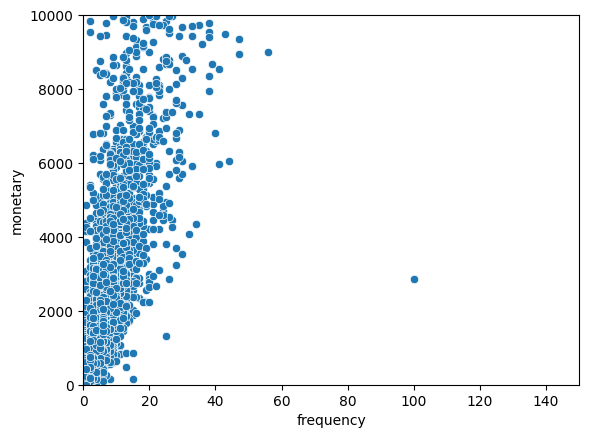

In [98]:
sns.scatterplot(x=data['frequency'], y=data['monetary'])
plt.xlim([0,150])
plt.ylim([0,10000])
plt.show()

### 4. Boxplots for each

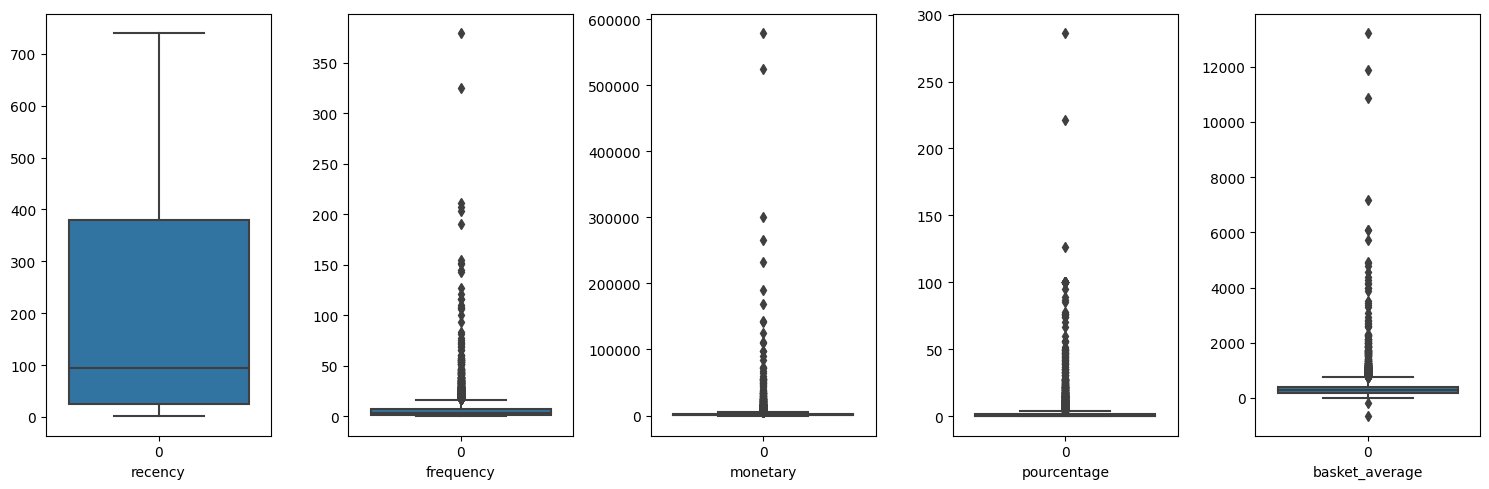

In [99]:
c = ['recency', 'frequency', 'monetary' , 'pourcentage' , 'basket_average']

# Créer une sous-figure avec plusieurs axes pour les boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(c), figsize=(15, 5))

# Parcourir les variables et tracer les boxplots correspondants
for i, var in enumerate(c):
    sns.boxplot(data=data[var], ax=axes[i])
    axes[i].set_xlabel(var)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les boxplots
plt.show()

In [100]:
data.head()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
0,12346.0,326,4,66.86,99.913566,16.71500
1,12347.0,3,8,4921.53,0.000000,615.19125
2,12348.0,76,5,2019.40,0.000000,403.88000
3,12349.0,19,4,4404.54,0.545308,1101.13500
4,12350.0,311,1,334.40,0.000000,334.40000


### 6. Removing Outliers using méthode des Quantiles

In [115]:
# Définir le seuil de suppression des valeurs extrêmes (par exemple, 0.95 pour garder les 95% des observations)
quantile_threshold = 0.95

# Calculer les quantiles pour chaque variable
quantiles = data.quantile(quantile_threshold)

# Appliquer la suppression des valeurs extrêmes pour chaque variable
filtered_data = data[(data <= quantiles).all(axis=1)]

# Afficher les statistiques résumées de l'ensemble de données filtré
filtered_data.describe()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000
mean,15209.645403,181.860757,4.503740,1381.638423,1.009775,291.537999
std,1617.424216,182.902735,4.096268,1551.283066,2.041371,159.996013
min,12347.000000,1.000000,1.000000,3.750000,0.000000,3.750000
25%,13812.250000,27.000000,1.000000,340.842500,0.000000,170.739500
50%,15221.000000,90.000000,3.000000,788.635000,0.000000,262.309286
75%,16617.750000,359.000000,6.000000,1794.225000,1.078089,376.196750
max,17991.000000,628.000000,21.000000,8859.820000,11.394443,841.340000


In [116]:
filtered_data = filtered_data.reset_index(drop=True)

In [118]:
filtered_data.head()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
0,12347.0,3,8,4921.53,0.000000,615.191250
1,12348.0,76,5,2019.40,0.000000,403.880000
2,12350.0,311,1,334.40,0.000000,334.400000
3,12351.0,376,1,300.93,0.000000,300.930000
4,12352.0,37,9,1889.21,5.987938,209.912222


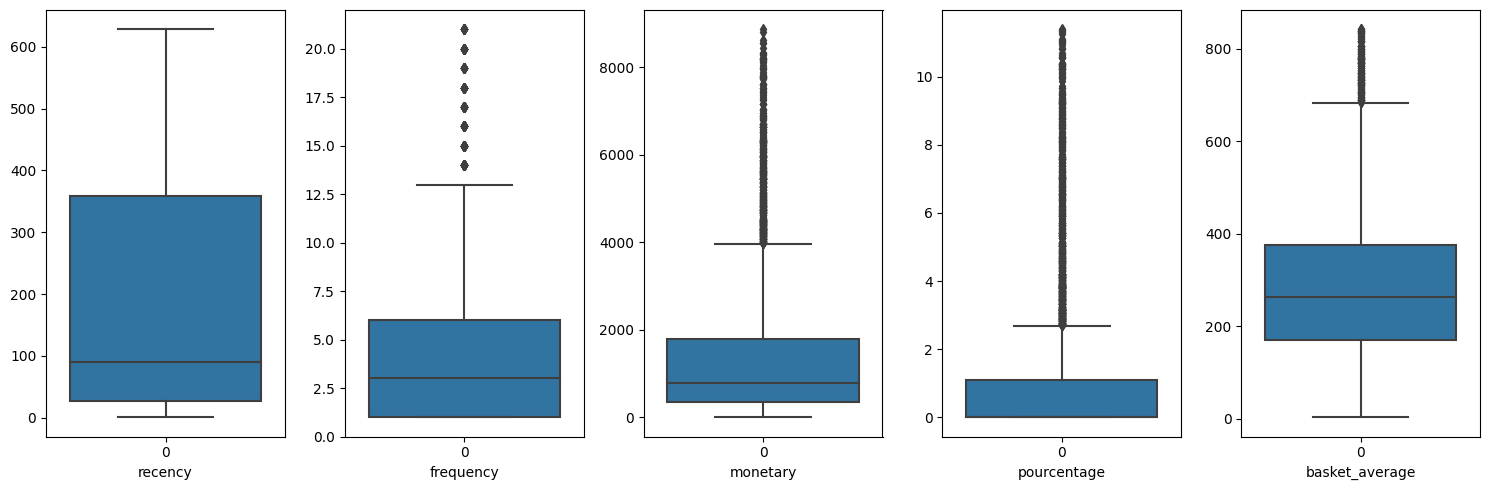

In [120]:
# Spécifiez les colonnes pour les boxplots
c = ['recency', 'frequency', 'monetary', 'pourcentage', 'basket_average']

# Créez une figure avec plusieurs sous-graphiques pour les boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(c), figsize=(15, 5))

# Parcourez les variables et tracez les boxplots correspondants
for i, var in enumerate(c):
    sns.boxplot(data=filtered_data[var], ax=axes[i])
    axes[i].set_xlabel(var)

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez les boxplots
plt.show()

### 7. Scaling the Data

In [146]:
c = ['recency', 'frequency', 'monetary' , 'pourcentage' , 'basket_average']

rfms = RobustScaler().fit(filtered_data[c]).transform(filtered_data[c])

rfms = pd.DataFrame(rfms, columns=c)

rfms

,recency,frequency,monetary,pourcentage,basket_average
0,-0.262048,1.0,2.843639,0.000000,1.717544
1,-0.042169,0.4,0.846828,0.000000,0.689052
2,0.665663,-0.4,-0.312536,0.000000,0.350879
3,0.861446,-0.4,-0.335565,0.000000,0.187974
4,-0.159639,1.2,0.757251,5.554213,-0.255027
...,...,...,...,...,...
4541,0.289157,0.4,0.069689,7.255744,-0.410427
4542,-0.234940,2.0,-0.215287,1.900243,-1.098593
4543,0.873494,-0.4,-0.399967,0.000000,-0.267595
4544,0.442771,0.6,0.504984,0.306030,-0.041603


### 8. ACP en 2 Dimensions

In [158]:
pca=PCA(n_components=2)
pc=pca.fit_transform(rfms)

df_acp=pd.DataFrame(data=pc,columns=['principal_component_1','principal_component_2'])
df_acp.head()

,principal_component_1,principal_component_2
0,-0.326302,2.979831
1,-0.791491,0.812869
2,-1.136235,-0.698134
3,-1.154226,-0.800341
4,4.684216,-0.346093


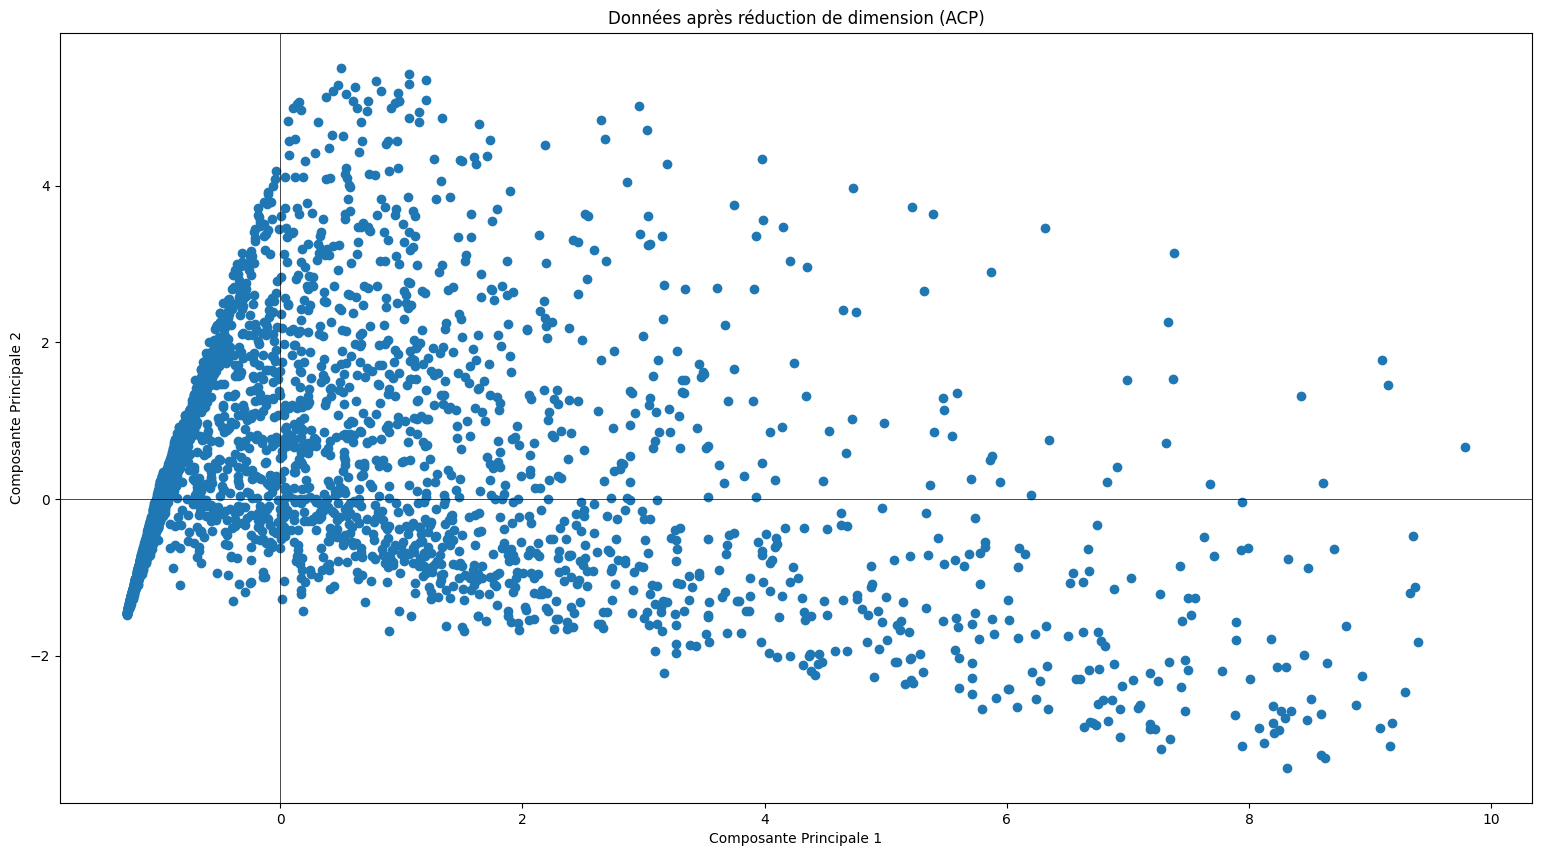

In [159]:
# Créer le graphe
pc1 = df_acp['principal_component_1']
pc2 = df_acp['principal_component_2']



plt.figure(figsize=(19, 10))
plt.scatter(pc1, pc2)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

# Ajouter les axes
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title('Données après réduction de dimension (ACP)')
plt.show()

### 9. Clustering Using K-Means

    Evaluating K-Means Performance by Cluster Number

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0.5, 1.0, 'KMeans Performance By Cluster Number')

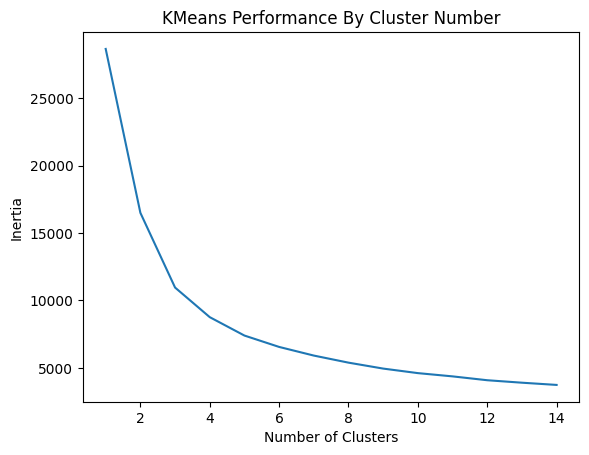

In [160]:
from sklearn.cluster import KMeans

plt.figure(dpi=100)
inertias = []
for i in range(1,15):
    inertias.append(KMeans(n_clusters = i).fit(rfms[c]).inertia_)
plt.plot(range(1,15), inertias)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title('KMeans Performance By Cluster Number')

    Assigning Clusters to Customers

In [161]:
n = ['principal_component_1',	'principal_component_2']
kp = pd.Series(KMeans(n_clusters = 4, random_state=10, max_iter=3000).fit(df_acp[n]).predict(df_acp[n]))
df_acp['Cluster'] = kp

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [162]:
df_acp.Cluster.value_counts()

0    3049
2     742
1     529
3     226
Name: Cluster, dtype: int64

In [163]:
pdf.Cluster

0       2
1       0
2       0
3       0
4       3
       ..
4541    3
4542    1
4543    0
4544    0
4545    0
Name: Cluster, Length: 4546, dtype: int32

In [234]:
# Nombre de clusters souhaité
n_clusters = 4

# Instanciation de l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters)

# Apprentissage des clusters
kmeans.fit(df_acp)

# Assignation des clusters pour chaque point
labels = kmeans.labels_

# Coordonnées des centroides de chaque cluster
centroids = kmeans.cluster_centers_

# Affichage des résultats
for i in range(n_clusters):
    cluster_points = df_acp.iloc[labels == i]
    print(f"Cluster {i+1}:")
    print(cluster_points)


Cluster 1:
      principal_component_1  principal_component_2
0                 -0.326302               2.979831
7                 -0.494839               2.378633
8                  0.419804               2.259312
10                 0.981073               2.996715
16                -0.428313               2.539203
...                     ...                    ...
4488               1.324737               1.328214
4492              -0.247882               1.825347
4493               0.358213               2.528162
4499              -0.425663               2.551403
4512               2.247580               2.257283

[742 rows x 2 columns]
Cluster 2:
      principal_component_1  principal_component_2
4                  4.684216              -0.346093
48                 4.807387              -1.410209
63                 8.513984              -2.550352
85                 7.499782              -2.185621
95                 5.688025              -0.703981
...                     ...         

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Cercle de corrélation

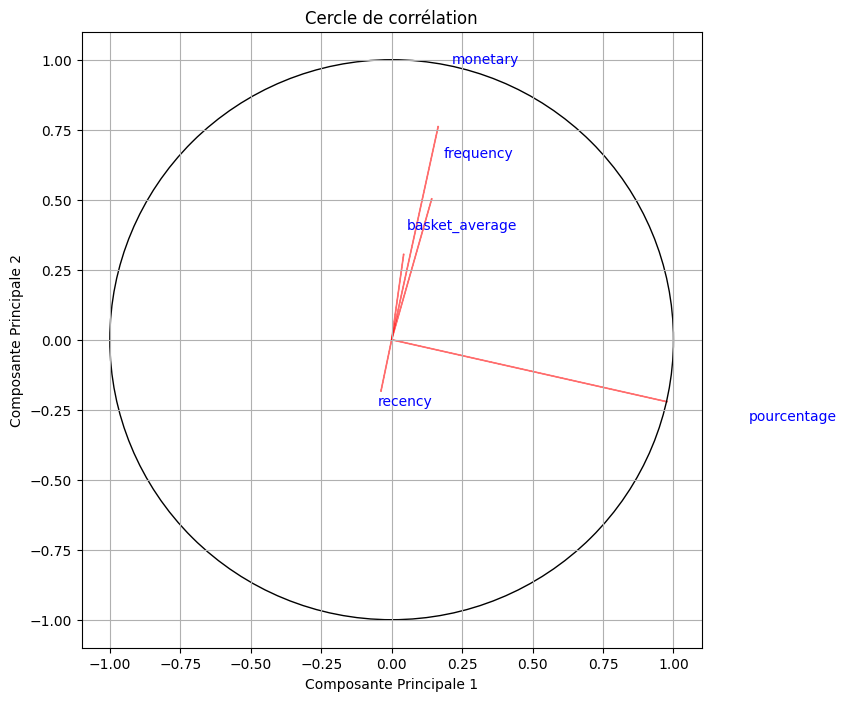

In [238]:

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(8, 8))

# Tracer les flèches et les noms de variable
features = rfms.columns
for i, feature in enumerate(features):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    ax.text(pca.components_[0, i] * 1.3, pca.components_[1, i] * 1.3, feature, color='b')

# Tracer le cercle de corrélation
circle = Circle((0, 0), 1, fill=False, color='black')
ax.add_patch(circle)

# Définir les limites des axes
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

# Définir les étiquettes des axes
ax.set_xlabel("Composante Principale 1")
ax.set_ylabel("Composante Principale 2")
ax.set_title("Cercle de corrélation")

# Afficher la grille
ax.grid()

# Afficher le plot
plt.show()


In [180]:
# Étape 5 : Interprétation des résultats de l'ACP
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale:", explained_variance_ratio)
print("Pourcentage de variance expliquée:", sum(explained_variance_ratio) * 100)

Variance expliquée par chaque composante principale: [0.58428514 0.27809066]
Pourcentage de variance expliquée: 86.2375802848143


### Kmeans => ACP

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



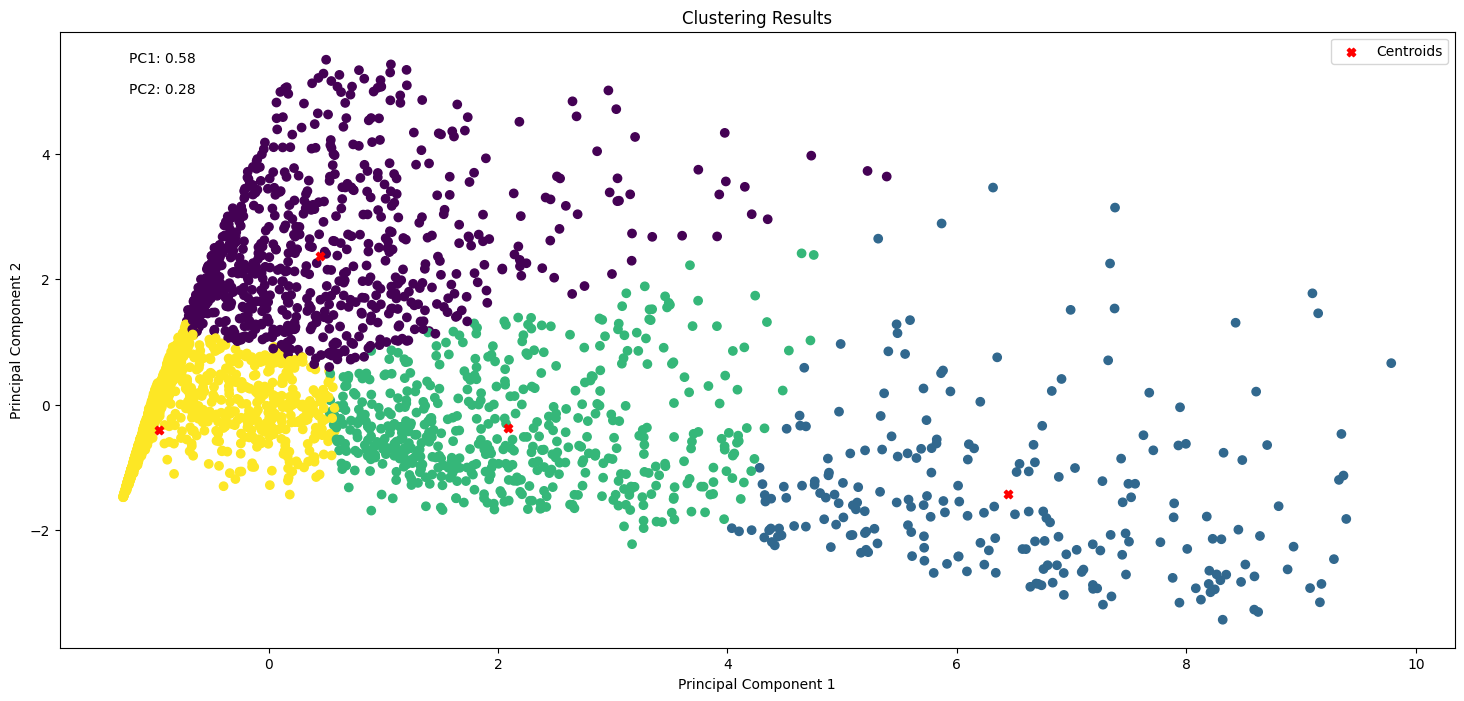

In [231]:
# Set the desired size of the figure
fig, ax = plt.subplots(figsize=(18, 8))

# Nombre de clusters souhaité
n_clusters = 4

# Instanciation de l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters)

# Apprentissage des clusters sur les données d'origine
kmeans.fit(rfms)

# Assignation des clusters pour chaque point
labels = kmeans.labels_

# Coordonnées des centroides de chaque cluster
centroids_original = kmeans.cluster_centers_

# Effectuer l'ACP sur les données d'origine
pca = PCA(n_components=2)
pc = pca.fit_transform(rfms)

# Créer un nouveau DataFrame avec les composantes principales obtenues
df_acp = pd.DataFrame(data=pc, columns=['principal_component_1', 'principal_component_2'])

# Coordonnées des centroides dans l'espace des composantes principales
centroids_acp = pca.transform(centroids_original)

# Tracer les résultats du clustering avec les composantes principales
plt.scatter(df_acp.values[:, 0], df_acp.values[:, 1], c=labels)
plt.scatter(centroids_acp[:, 0], centroids_acp[:, 1], c='red', marker='X', label='Centroids')

# Add annotations for variance explained and variable contributions
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    ax.annotate(f"PC{i+1}: {ratio:.2f}", (0.05, 0.95 - i*0.05), xycoords='axes fraction')

    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')

plt.legend()
plt.show()


    Visualizing Customer Clusters in 3D

    Analyzing Cluster Characteristics
    - Display the means 